In [7]:
from fastbook import *

In [8]:

API_KEY = "57b93ec1d812051ed0177a5b0d98e61526f1c2b70f9160dc35c9752df0145d29"

Generating bird image (using google's serpapi)

In [9]:
from serpapi import GoogleSearch

def search_images_serpapi(term, max_images=200):
    params = {
        "engine": "google_images",
        "q": term,
        "api_key": {API_KEY}
    }
    search = GoogleSearch(params)
    results = search.get_dict()
    return [img['original'] for img in results.get("images_results", [])[:max_images]]




In [10]:
myList = search_images_serpapi("bird photos")
print(myList[3])

https://i0.wp.com/www.blog.catandturtle.net/wp-content/uploads/2013/04/201304129_copyrightJessYarnell.jpg


In [11]:
import requests
#requests.get("https://duckduckgo.com").status_code

##check number of searches left
url = f"https://serpapi.com/account?api_key={API_KEY}"
res = requests.get(url)
data = res.json()
print(data)  # See the actual response from SerpAPI


{'account_id': '689ca680a8908726cb36dc2c', 'api_key': '57b93ec1d812051ed0177a5b0d98e61526f1c2b70f9160dc35c9752df0145d29', 'account_email': 'mohammedamoshood@gmail.com', 'account_status': 'Active', 'plan_id': 'free', 'plan_name': 'Free Plan', 'plan_monthly_price': 0.0, 'searches_per_month': 250, 'plan_searches_left': 237, 'extra_credits': 0, 'total_searches_left': 237, 'this_month_usage': 13, 'this_hour_searches': 0, 'last_hour_searches': 0, 'account_rate_limit_per_hour': 250}


Saving bird image as a project file. (using the Path() and download_url() functions)

In [12]:
dest = Path('bird0001.jpg')
if not dest.exists() : download_url(myList[0], dest=dest, show_progress=False)

Displaying image direct from on jupyter (using Image.open())

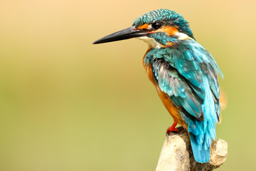

In [13]:
im = Image.open(dest)
im.to_thumb(256,256)

Function to Download random forest and bird pictures (serpAPI)

In [14]:
searches = 'forest', 'bird'
dest2 = Path('bird_or_not')


if not dest2.exists():
    dest2.mkdir()
    for o in searches:
        myDest = (dest2/o)
        myDest.mkdir(parents=True, exist_ok=True)
        myPics = search_images_serpapi(f"{o} photo")
        download_images(myDest,urls=myPics[:200])
        resize_images(myDest,max_size=400, dest = myDest)
        

Verifying images for any corruption

In [15]:
failure = verify_images(get_image_files(dest2))
failure.map(Path.unlink)

(#0) []

Creating a datablock

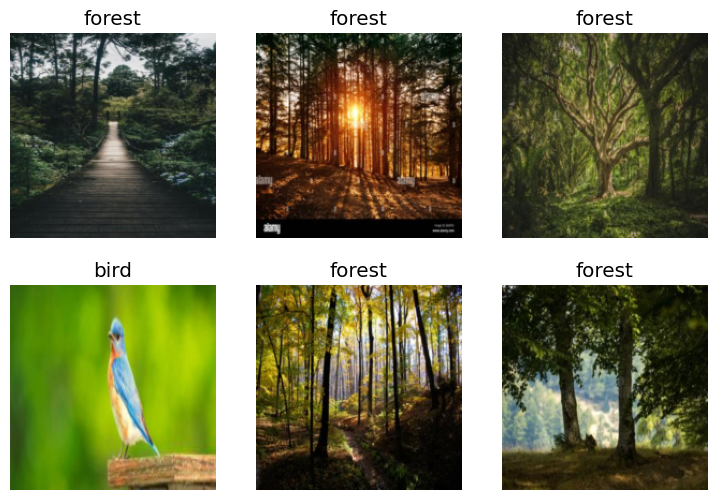

In [16]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 40),
    get_y = parent_label,
    item_tfms= Resize(192, method='squish')
).dataloaders(dest2)
##display images
dls.show_batch(max_n = 6)

Training Model

In [17]:
Learn = vision_learner(dls, arch=resnet18, metrics = error_rate)
Learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.499346,0.815881,0.343750,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.245751,0.372155,0.125000,00:32
1,0.147238,0.116156,0.031250,00:31
2,0.099169,0.038196,0.031250,00:32


Testing model

In [28]:
is_bird,_,probs = Learn.predict(PILImage.create("bird_or_not/download (1).jpeg"))
print(f"this is a : {is_bird}")
print(f"probability it's a bird {probs[0]}")

this is a : forest
probability it's a bird 0.0009647277183830738


Other machine learning capabilities

In [30]:
## SEGMENTATION

seg_path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    seg_path, fnames=get_image_files(seg_path/"images"),
    label_func= lambda o: seg_path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(seg_path/'codes.txt',dtype=str)
)

seg_learn = unet_learner(dls,resnet34)
seg_learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:13<00:00, 6.55MB/s]


epoch,train_loss,valid_loss,time
0,3.798801,3.481801,01:44


epoch,train_loss,valid_loss,time
0,3.515282,3.483212,01:39
1,3.421566,3.170856,01:28
2,3.322851,9.848378,01:22
3,3.978492,2.891904,01:19
4,3.700330,2.662942,01:35
5,3.487758,2.512841,01:25
6,3.330894,2.471393,01:39
7,3.195128,2.462621,01:41


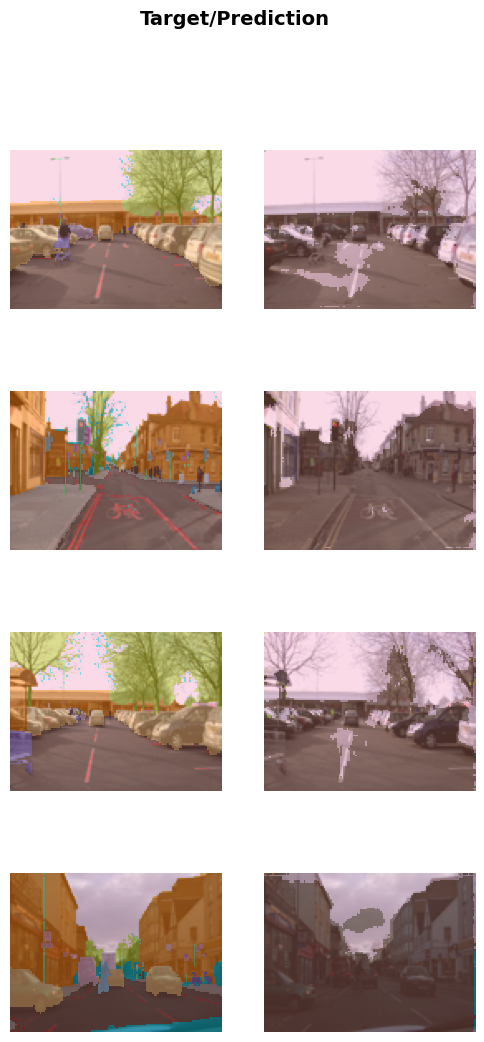

In [31]:
seg_learn.show_results(max_n = 4)